# GRADIENT DESCENT 

* Batch gradient descent
* Stochastic gradient descent
* Mini-Batch Gradient Descent

## Batch gradient descent

In [1]:
import numpy as np

In [92]:
class GradientDescent :

    def __init__(self, stepsize=0.1, iterations=1000, batch_size=None):

        self.stepsize = stepsize
        self.iterations= iterations
        self.batch_size = batch_size

    def mse_loss(self, X,y,theta):
        return np.sum((X.dot(theta) - y)**2)/(2*len(y))
    
    def mse_grad(self, X,y,theta) :
        return X.T.dot(X.dot(theta) - y)/len(y)
    
    def sigmoid(self, z):
        return 1/1+np.exp(-z)

    def log_loss(self,X,y,theta):
        h = self.sigmoid(X.dot(theta))
        return -np.divide(np.sum(y*np.log(h)+(1-h)*np.log(1-h)),len(y))
    
    def log_loss_grad(self,X,y,theta):
     
        return X.T.dot(np.sum(self.sigmoid(X.dot(theta)) - y)/len(y))
    
    def gradientdescent(self, X,y, theta, loss_cost, grad_loss):

        history_loss = []

        for _ in range(self.iterations):
            loss = loss_cost(X,y,theta)
            grad = grad_loss(X,y,theta)
            theta -= theta*self.stepsize*grad
            history_loss.append(loss)
        
        return theta, history_loss
    
    def batch_gradient_descent(self, X,y, theta_initial):
        return self.gradientdescent(X,y, theta_initial, self.mse_loss, self.mse_grad)
    
    def stochastic_gradient_gradient(self,X,y, theta_initial):
        cost_functiion = self.mse_loss if self.batch_size is None else self.log_loss
        grad_function = self.mse_grad if self.batch_size is None else self.mse_grad
        return self.gradientdescent(X,y,theta_initial, cost_functiion, grad_function) 
    
    def mini_batch_gradient(self, X,y, theta_initial):
        batch_size = self.batch_size if self.batch_size is not None else len(y)
        return self.gradientdescent(X,y, theta_initial, self.mse_loss, self.mse_grad)

        

In [88]:
# simple data generation
np.random.seed(0)

# Create X sample
X = np.random.rand(1000,1)
y = X**2

# add one colonne
X_b = np.hstack((np.ones((X.shape[0],1)),X))


In [56]:
import matplotlib.pyplot as plt

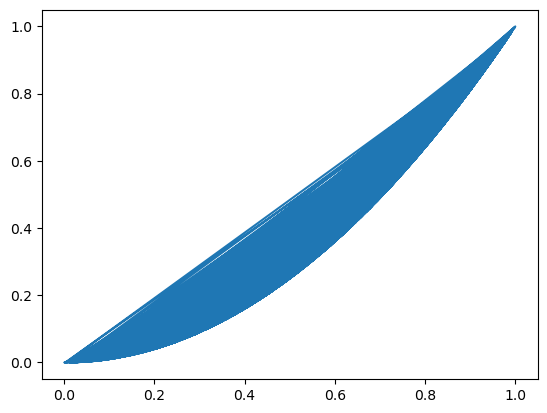

In [57]:
plt.plot(X,y)

In [91]:
tetha_initial = np.random.rand(2,1)

grad = GradientDescent(stepsize=0.1, iterations=100)

In [90]:
theta_batch, cost_hyst_batch = grad.batch_gradient_descent(X_b,y,tetha_initial)
theta_stoc, cost_hyst_stoc = grad.stochastic_gradient_gradient(X_b,y,tetha_initial)
theta_mini, cost_hyst_mini = grad.mini_batch_gradient(X_b,y,tetha_initial)

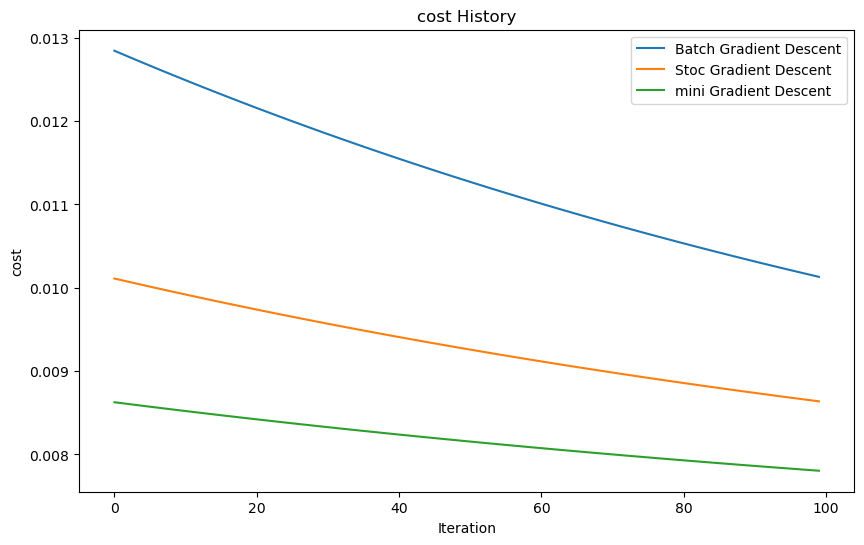

In [89]:
plt.figure(figsize=(10,6))
plt.plot(cost_hyst_batch, label='Batch Gradient Descent')
plt.plot( cost_hyst_stoc, label='Stoc Gradient Descent')
plt.plot(cost_hyst_mini, label='mini Gradient Descent')

plt.title('cost History')
plt.xlabel('Iteration')
plt.ylabel('cost')
plt.legend()
